#8. 신경망 $\cdot$ 딥러닝의 응용(필기체 숫자 인식)

##8.1 MNIST 데이터베이스

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test,) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


실행하면 60,000개의 훈련용 데이터 (이미지와 라벨)가 **x_trrain, y_train**에 저장되며, 10,000개의 테스트용 데이터는 **x_test, y_test**에 저장된다.

**x_train** : $60000\times28\times28$ 배열, 0 ~ 255의 값을 갖는 정수

**y_train** : 길이가 $60000$인 1차원 배열, 0 ~ 9의 정수

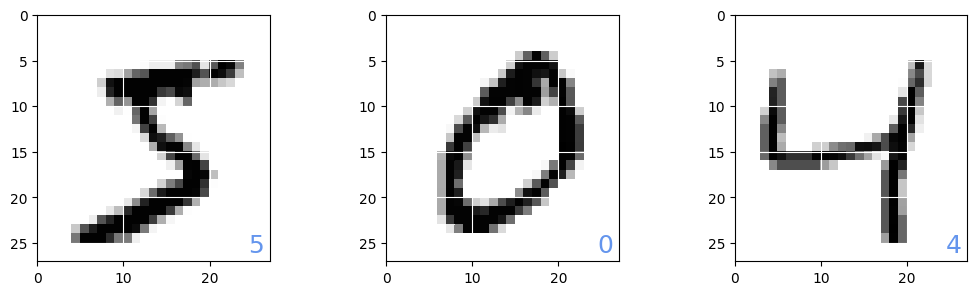

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
  plt.subplot(1,3, id+1)
  img = x_train[id, :, :]
  plt.pcolor(255 - img)
  plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid('on', color='white')

plt.show()

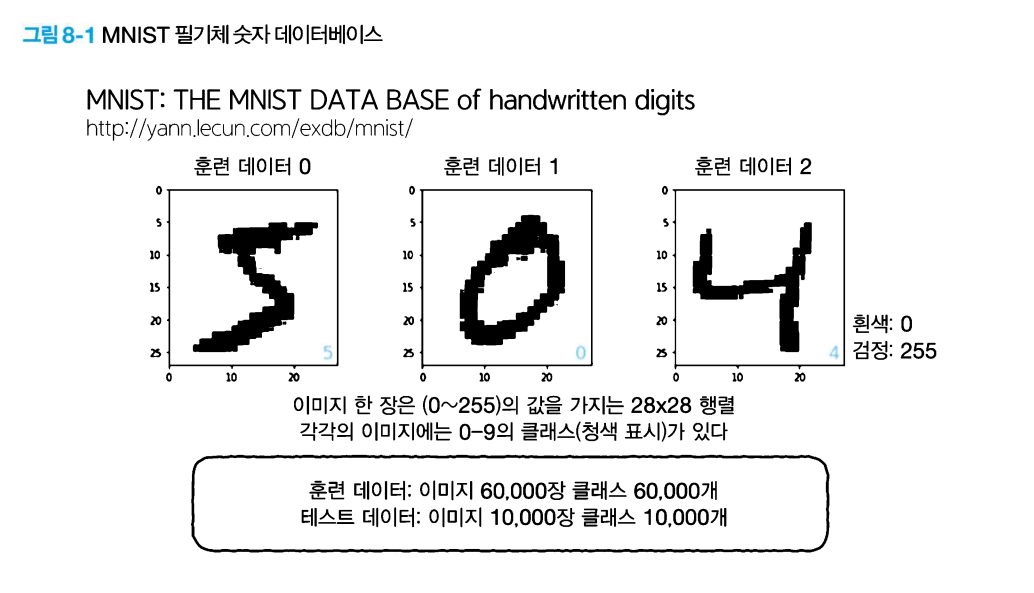

##8.2 2층 피드 포워드 네트워크 모델

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(60000, 784) #(A) 28x28 => 784
x_train = x_train.astype('float32') #(B) 실수로 처리
x_train = x_train / 255 #(C) 0~1의 실수로 변환
num_classes = 10
y_train = to_categorical(y_train, num_classes) #(D) 1-of-K 부호화법으로 변경

# test도 동일하게 변경
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

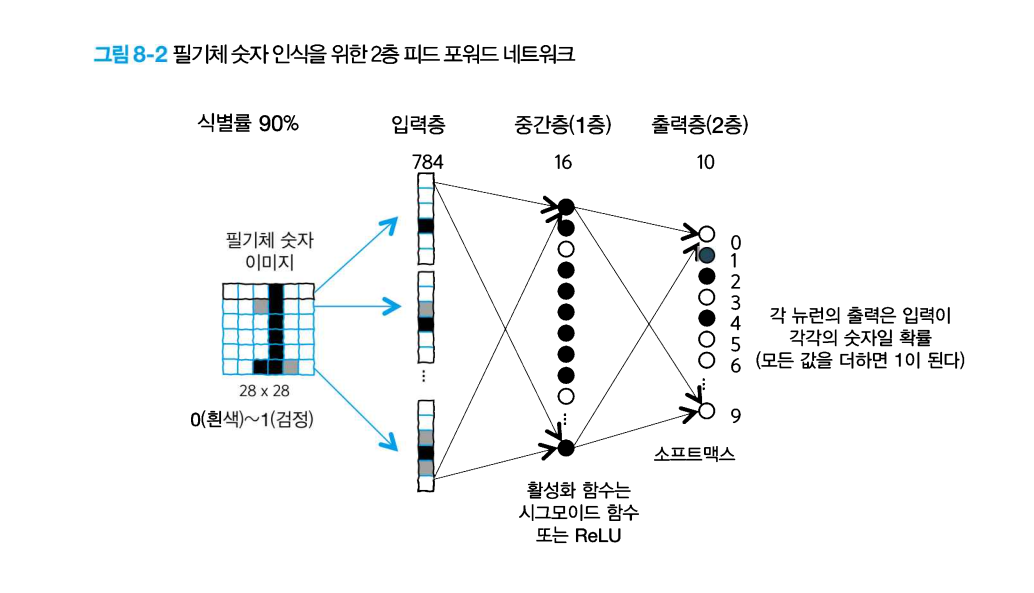

입력 : 784차원의 벡터

출력층 : 10개의 뉴런 (확률을 나타내도록 활성화 함수는 소프트맥스)

중간층 : 16개의 뉴런 (활성화 함수는 시그모이드 함수)

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add( Dense(16, input_dim=784, activation='sigmoid') ) #(B)
model.add( Dense(10, activation='softmax') ) #(C)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) #(D)

In [ ]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) #(A) verbose : 학습 과정 표시 (표시하지 않으려면 0으로)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 6s 21ms/step - loss: 2.0527 - accuracy: 0.3923 - val_loss: 1.7504 - val_accuracy: 0.6966
Epoch 2/10
60/60 [==============================] - 0s 8ms/step - loss: 1.5699 - accuracy: 0.7513 - val_loss: 1.3906 - val_accuracy: 0.7989
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 1.2745 - accuracy: 0.8118 - val_loss: 1.1444 - val_accuracy: 0.8363
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 1.0628 - accuracy: 0.8396 - val_loss: 0.9627 - val_accuracy: 0.8588
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.9045 - accuracy: 0.8586 - val_loss: 0.8257 - val_accuracy: 0.8709
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.7844 - accuracy: 0.8701 - val_loss: 0.7210 - val_accuracy: 0.8805
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.8772 - val_loss: 0.6410 - val_accuracy: 0.8893
Epoch 8/10
60/60 [=

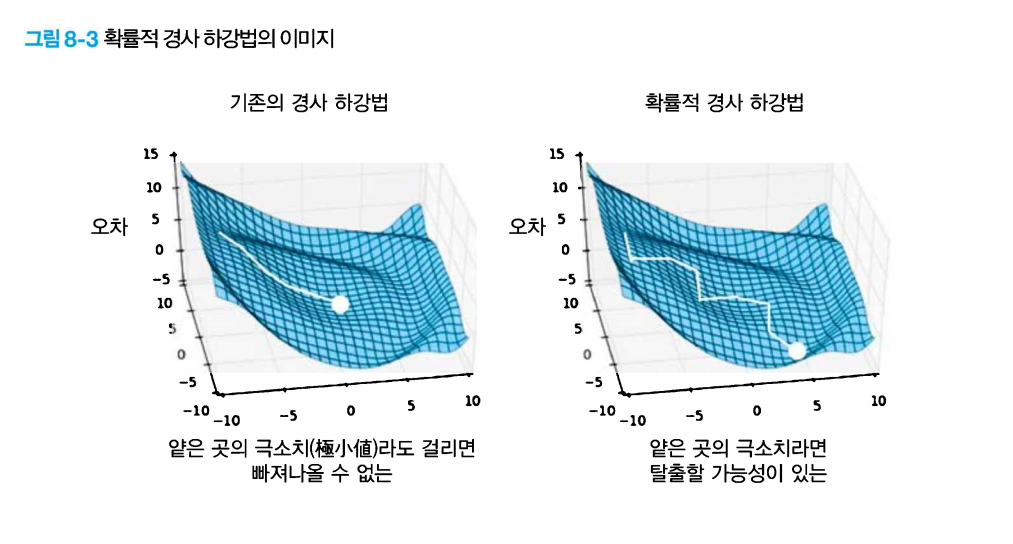

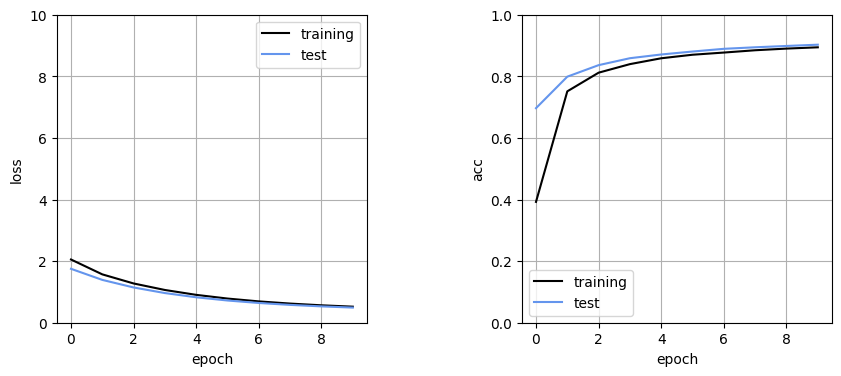

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

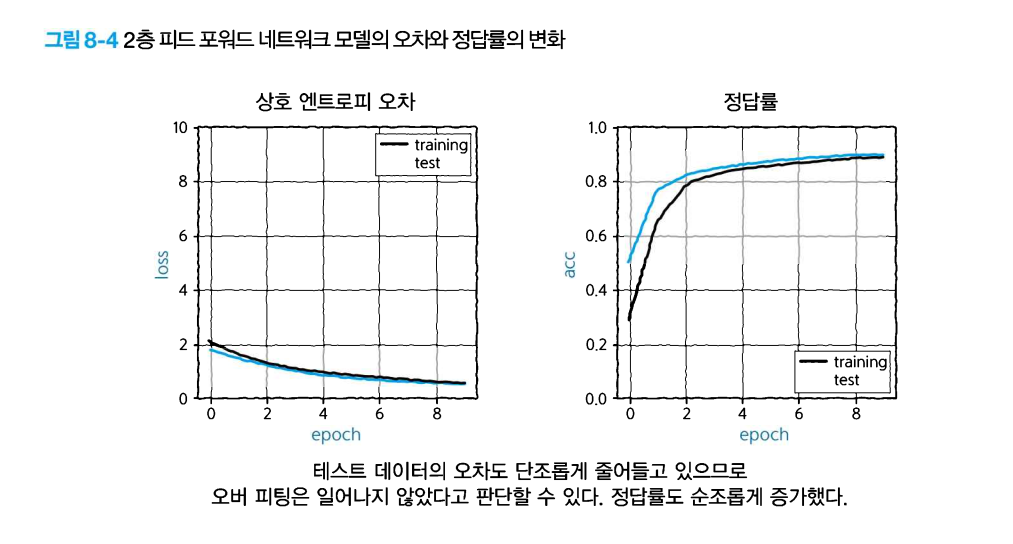

313/313 [==============================] - 1s 2ms/step


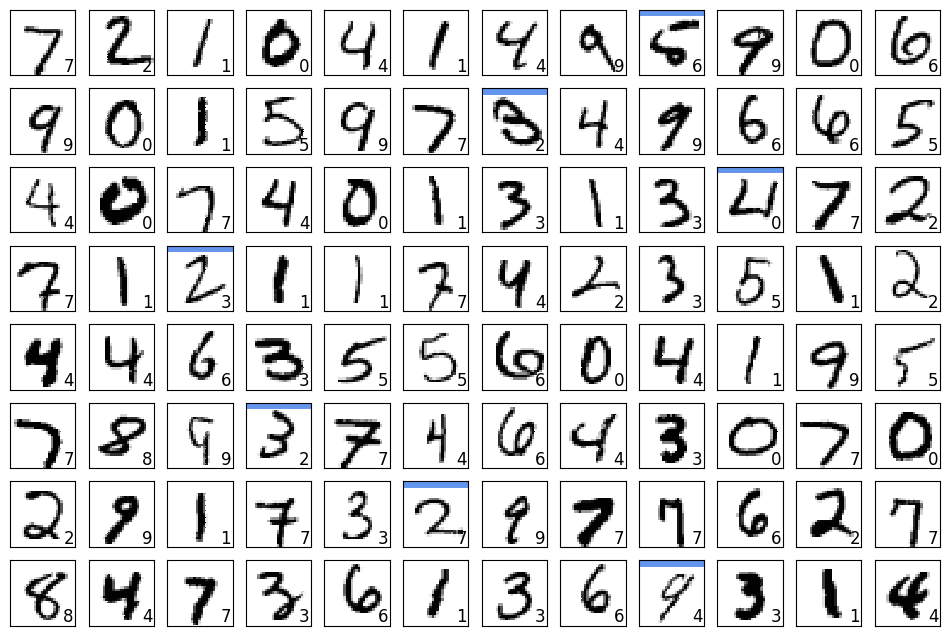

In [ ]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

#메인
show_prediction()
plt.show()

##8.3 ReLU 활성화 함수

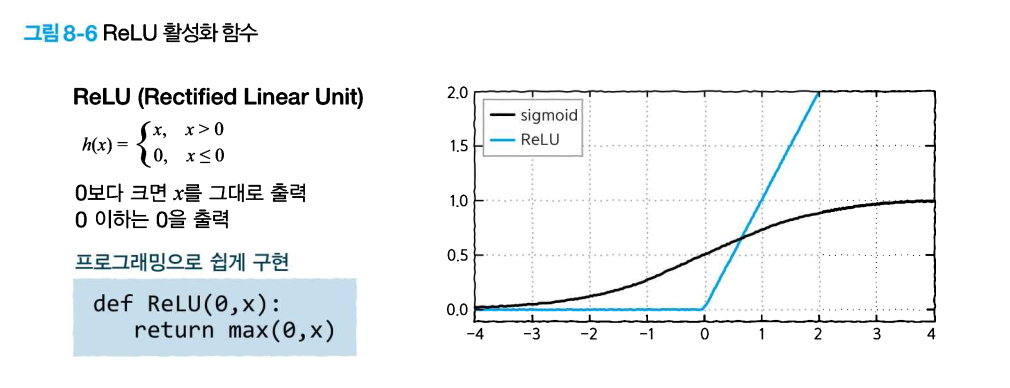

시그모이드 함수는 입력 x가 어느 정도 커지면 항상 1에 가까운 값을 출력하기 때문에, 입력의 변화가 출력에 반영되기 어렵다. 그 결과, 오차 함수의 가중치 매개 변수에 대한 편미분이 0에 가까운 값이 되어, 경사 하강법의 학습이 늦어지는 문제점이 있었다.

그러나 ReLU을 사용하면 입력이 긍정적이면 학습의 정체 문제는 해결된다. 또한 프로그램에서는 **max(0,x)**로 쉽게 나타낼 수 있기 때문에 계산이 빠르다는 장점도 있다.

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) #(A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 15ms/step - loss: 1.4881 - accuracy: 0.5614 - val_loss: 0.8472 - val_accuracy: 0.8216
Epoch 2/10
60/60 [==============================] - 0s 8ms/step - loss: 0.6416 - accuracy: 0.8476 - val_loss: 0.4758 - val_accuracy: 0.8863
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4397 - accuracy: 0.8862 - val_loss: 0.3803 - val_accuracy: 0.9023
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3693 - accuracy: 0.9009 - val_loss: 0.3347 - val_accuracy: 0.9107
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3322 - accuracy: 0.9093 - val_loss: 0.3088 - val_accuracy: 0.9164
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3088 - accuracy: 0.9150 - val_loss: 0.2915 - val_accuracy: 0.9207
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 0.9194 - val_loss: 0.2791 - val_accuracy: 0.9236
Epoch 8/10
60/60 [=

313/313 [==============================] - 1s 2ms/step


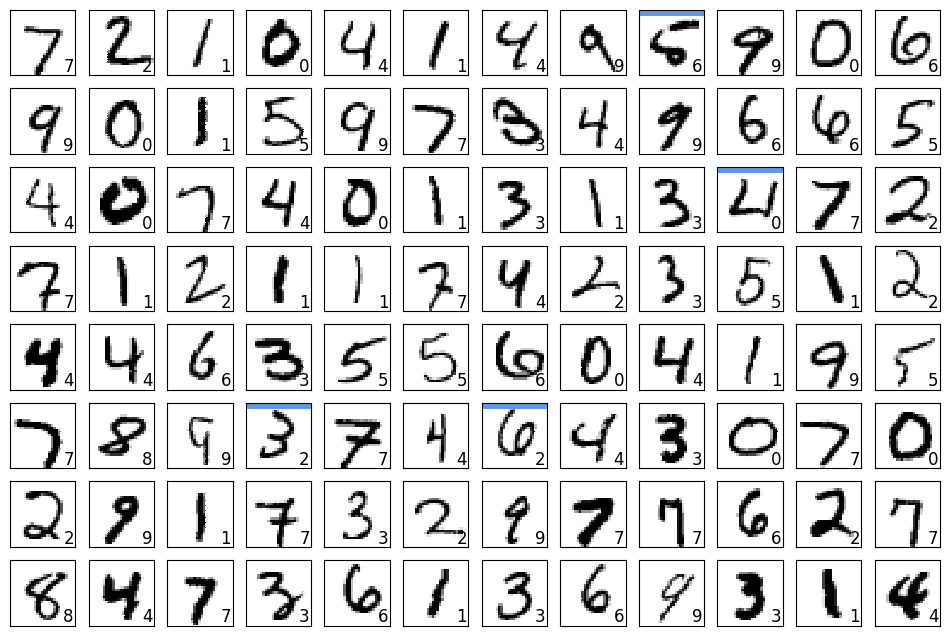

In [ ]:
show_prediction()
plt.show()

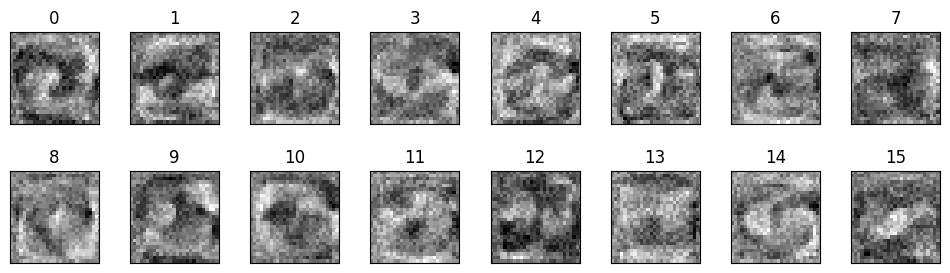

In [ ]:
# 1층째의 가중치 시각화

w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
  plt.subplot(2, 8, i + 1)
  w1 = w[:, i]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
plt.show()

정밀도를 더욱 높이려면 어떻게 해야할까?

중간층 뉴런을 늘리는 방법도 있지만 더 근본적인 문제가 있다.

이 모델은 '입력은 2차원 이미지'라는 공간 정보를 전혀 사용하지 않는다.

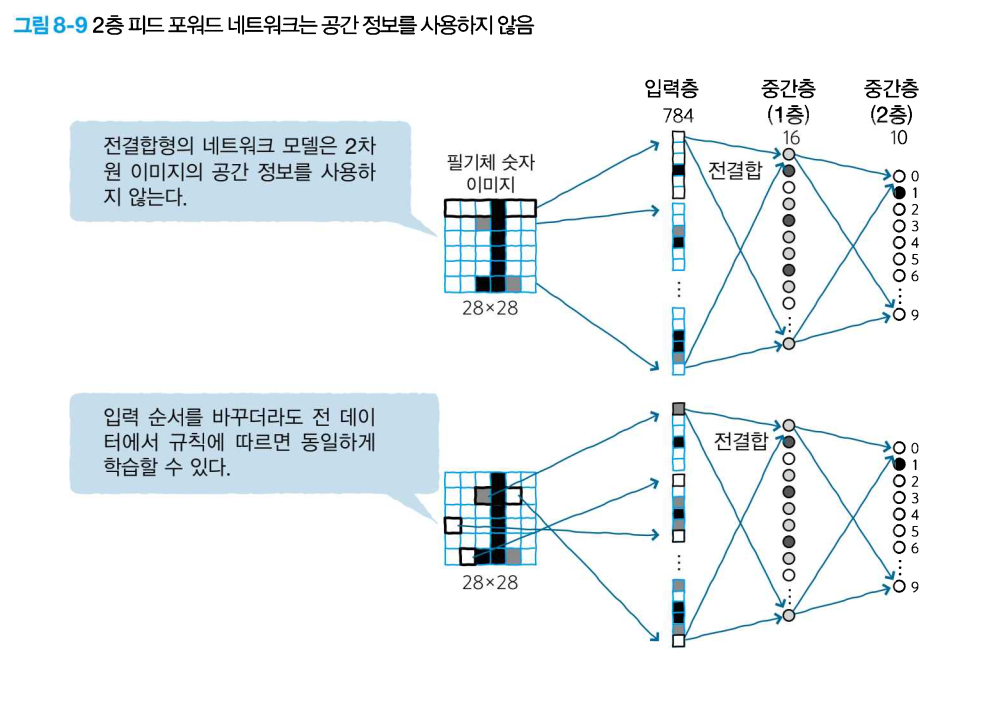

이러한 변환을 계속해 각각의 이미지가 마구 섞여도 성능은 변하지 않는다.

그 이유는 네트워크 구조가 전결합형이며 모든 입력 성분은 대등한 관계이기 때문이다. 이웃에 있는 입력 성분도, 멀리 떨어진 입력 성분도 수식상으로는 똑같은 관계다. 그래서 공간 정보가 사용되고 있지 않다.

##8.4 공간 필터

공간 정보 : 직선, 곡선, 원형, 사각형 같은 모양을 나타내는 정보

이러한 형태를 골라 내는 방법으로 '공간 필터'라는 이미지 처리법이 있다.

필터는 2차원 행렬로 표현된다.

2차원 행렬의 하나로, 세로 엣지를 강조하는 $3\times3$ 필터의 예를 [그림 8-10]에 나타냈다.

이미지의 일부분과 필터 요소를 곱한 합을, 이미지를 슬라이드 시키면서 이미지의 전 영역에서 구한다. 이러한 겨ㅖ산을 '합성곱 연산'이라고 한다.

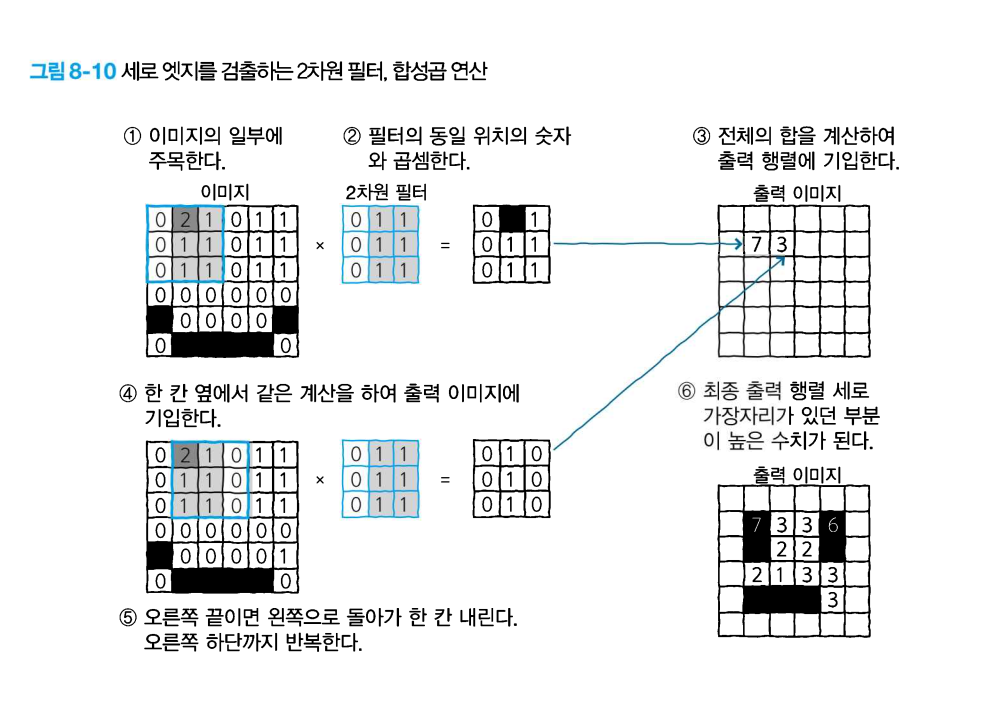

원본 이미지의 위치 $(i,j)$의 필셀 값을 $x(i,j), 3\times3$의 필터를 $h(i,j)$로 하면, 합성곱 연산에서 얻어지는 값 $g(i,j)$는 [식 8-1]이 된다.

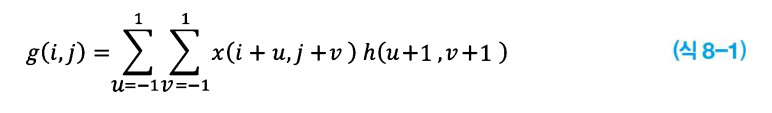

필터의 크기는 중심을 결정할 수 있는 홀수 너비가 사용하기 쉽다.

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

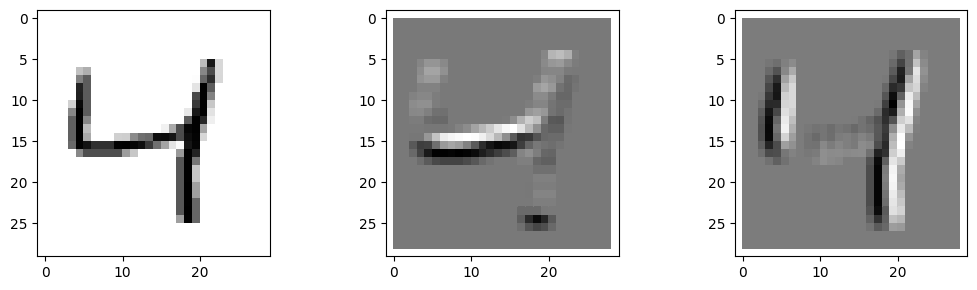

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1], [1,1,1], [-2,-2,-2]], dtype=float) #(A)
myfil2 = np.array([[-2,1,1], [-2,1,1], [-2,1,1]], dtype=float) #(B)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

#필터 처리
for ih in range(img_h - 3):
  for iw in range(img_w - 3):
    img_part = x_img[ih:ih + 3, iw:iw + 3]
    out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
    out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

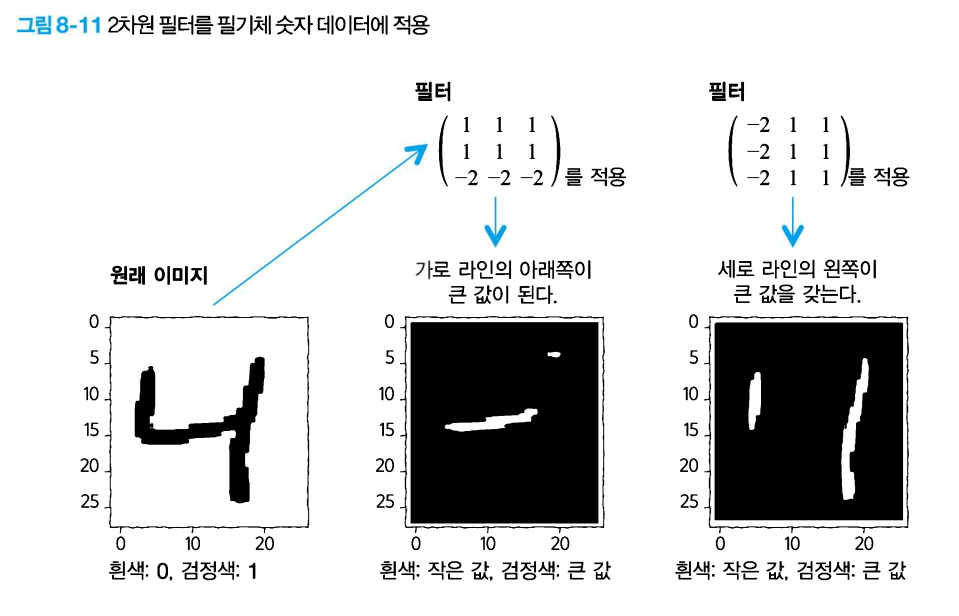

예제로 가로와 세로의 엣지를 강조하는 필터를 시험했지만, 필터의 수치를 바꾸는 것으로 대각선 엣지 강조, 이미지 스무딩, 세부 부분의 강조 등 다양한 처리가 가능하다.

그런데 [그림 8-11]의 필터는 모든 요소를 합하면 0이 되도록 디자인되어 있다. 이렇게 하면 공간 구조가 없는 균일한 부분은 0으로 변환되고, 필터에서 추출하려는 구조가 존재할 경우에는 0 이상의 값으로 변환되어, 0을 감지 레벨의 기준으로 세울 수 있어 편리하다.

필터를 적용하면 출력 이미지의 크기는 작아진다. 대응책으로 패딩이라는 방법이 있다.

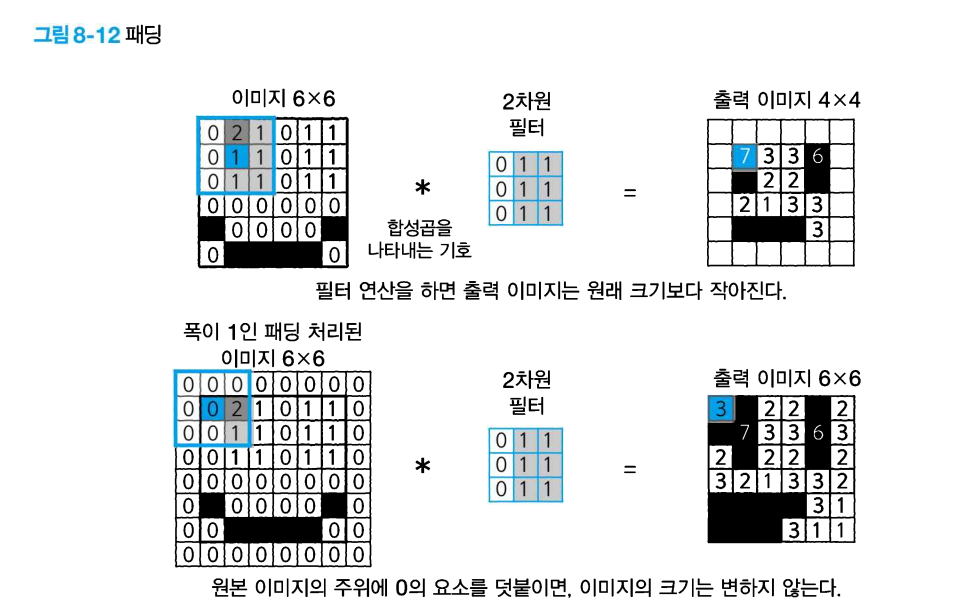

패딩은 필터를 적용하기 전에 0 등의 고정된 요소로 주위를 부풀려두는 방법이다.

3x3 필터는 폭 1의 패딩, 5x5는 2인 패딩이 좋다.

지금까지는 필터는 한 칸씩 이동했지만, 2칸이나 3칸 등 어떤 간격이든 이동할 수 있다.

이 간격을 스트라이드라고 한다. 스트라이드를 크게 하면 출력 이미지가 작아진다.

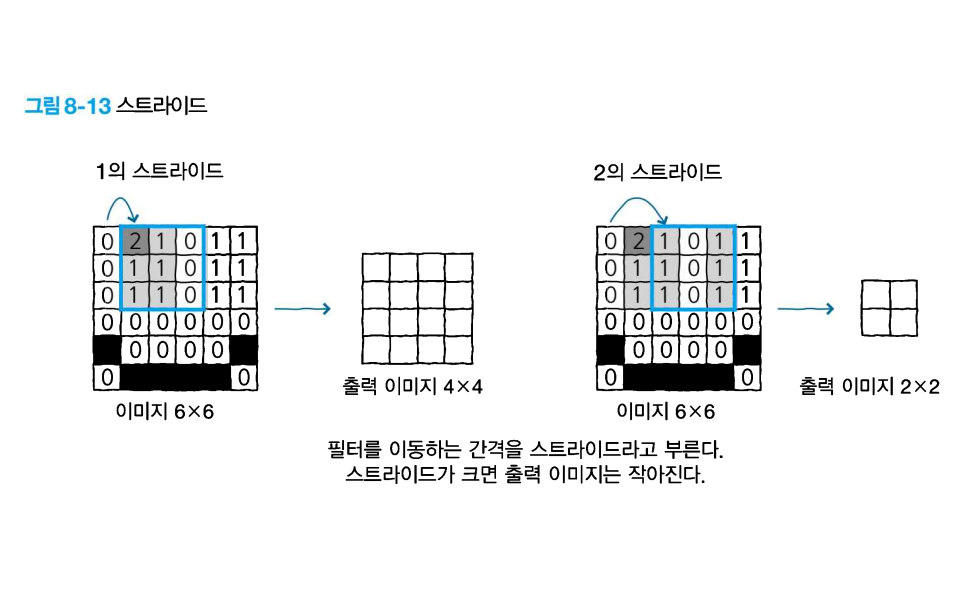

##8.5 합성곱 신경망

필터를 사용한 신경망을 합성곱 신경망(Convolution Neural Network:CNN)이라고 한다.

CNN은 필터 자체를 학습시킨다.

먼저 필터 8장을 사용한 간단한 CNN을 만들어 보자.

[그림 8-14]에 나타낸 바와 같이, 입력 이미지에 대해 크기 3x3, 패딩 1, 스트라이드 1의 필터를 8장 적용한다.

1장의 필터의 출력은 28x28 배열이므로 총 28x28x8의 3차원 배열이 된다. 이를 1차원으로 길이가 6272인 배열로 전개하고, 전결합으로 10개의 출력층 뉴런에 결합한다.

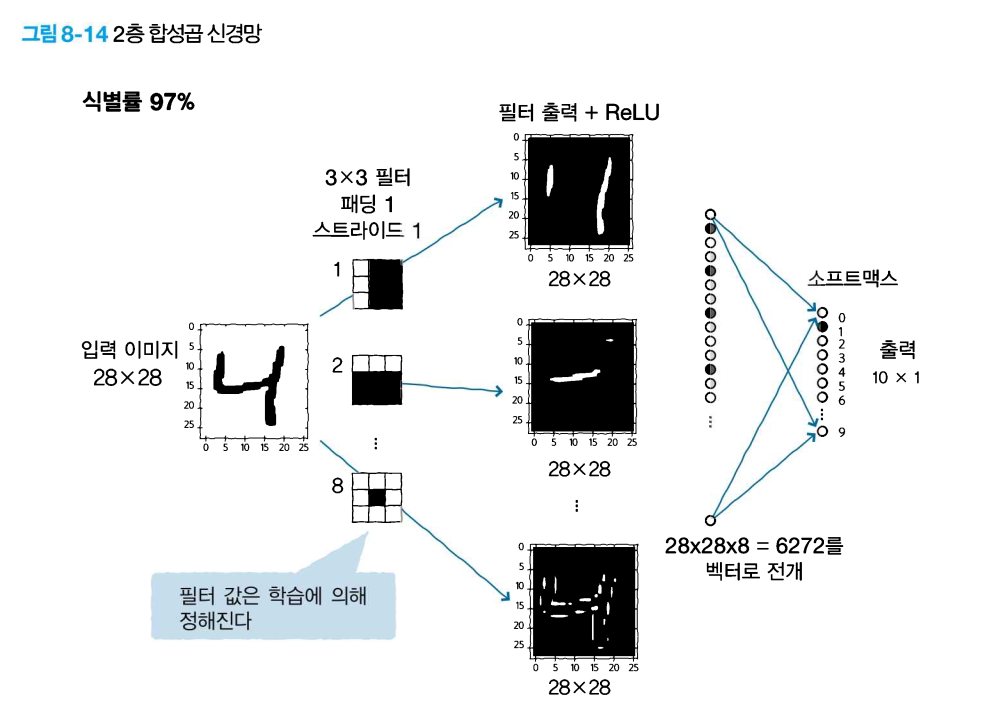

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1), activation='relu')) #(A) 3x3 필터 8개 / 출력 크기가 변하지 않도록 패딩 추가 / 흑백 이미지이므로 1, 컬러 이미지는 3 / relu 함수 / 기본적으로 바이어스 입력도 지정되어있다.(1변수씩, 초기값 0으로)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 3s 11ms/step - loss: 0.7741 - accuracy: 0.8097 - val_loss: 0.3375 - val_accuracy: 0.9051
Epoch 2/20
60/60 [==============================] - 0s 7ms/step - loss: 0.3071 - accuracy: 0.9124 - val_loss: 0.2567 - val_accuracy: 0.9264
Epoch 3/20
60/60 [==============================] - 0s 6ms/step - loss: 0.2467 - accuracy: 0.9297 - val_loss: 0.2118 - val_accuracy: 0.9410
Epoch 4/20
60/60 [==============================] - 0s 6ms/step - loss: 0.2038 - accuracy: 0.9424 - val_loss: 0.1779 - val_accuracy: 0.9497
Epoch 5/20
60/60 [==============================] - 0s 6ms/step - loss: 0.1694 - accuracy: 0.9524 - val_loss: 0.1518 - val_accuracy: 0.9580
Epoch 6/20
60/60 [==============================] - 0s 6ms/step - loss: 0.1431 - accuracy: 0.9603 - val_loss: 0.1338 - val_accuracy: 0.9645
Epoch 7/20
60/60 [==============================] - 0s 6ms/step - loss: 0.1230 - accuracy: 0.9668 - val_loss: 0.1155 - val_accuracy: 0.9675
Epoch 8/20
60/60 [=

313/313 [==============================] - 0s 1ms/step


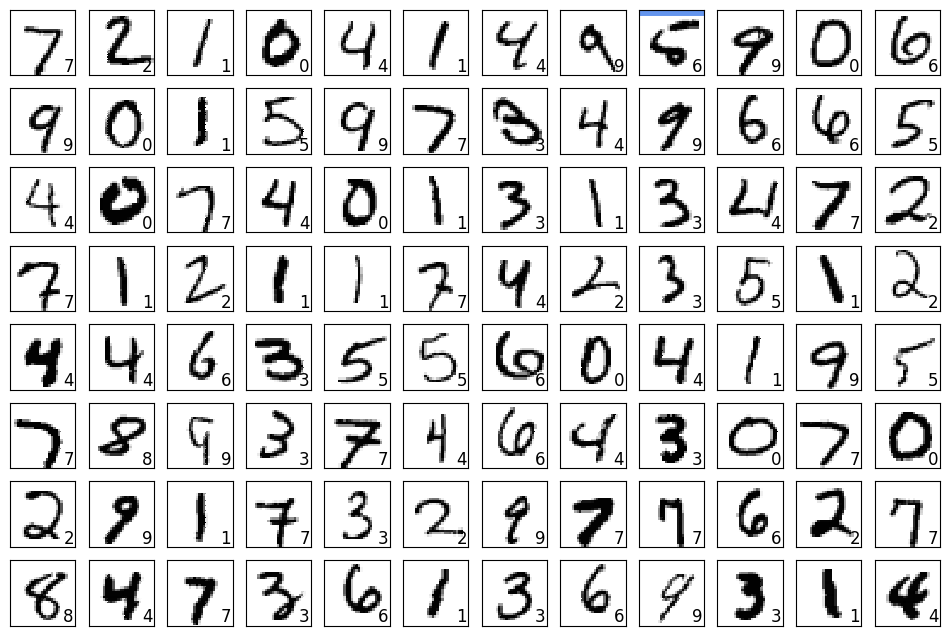

In [ ]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

show_prediction()
plt.show()

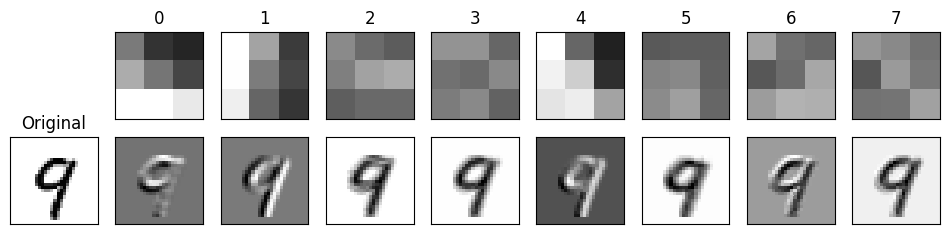

In [ ]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28

x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] #(A)
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
  plt.subplot(2, 9, i + 2)
  w1 = w[:, :, 0, i]
  w1 = w1.reshape(3,3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0,3)
  plt.ylim(3,0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
  plt.subplot(2,9,i + 11)
  out_img = np.zeros_like(x_img)

  #필터 처리
  for ih in range(img_h - 3):
    for iw in range(img_w - 3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")
plt.show()

##8.6 풀링

이미지 인식과 관련해 중요한 것이 하나 더 있다. 이미지의 위치의 어긋남에 대한 견고성이다. 예를 들어 필기체 숫자 '2'가 1픽셀만 어긋난 이미지를 입력해도 각 배열의 수치는 완전히 달라진다. 인간의 눈으로 봐서는 거의 동일한 입력이지만 네트워크에서는 완전히 다른 패턴으로 인식되어 버린다.

이 문제를 해결하는 방법으로 '풀링 처리'가 있다.

[그림 8-17]에 2x2 최대 풀링(max pooling)의 예를 나타냈다. 입력 이미지 내의 2x2의 작은 영역에 착안하여 가장 큰 값을 출력값으로 한다. 작은 공간은 스트라이드 2로 이동해 동일한 처리를 반복하고 있다. 그 결과, 출력 이미지의 가로 세로 크기는 입력 이미지의 절반이 된다.

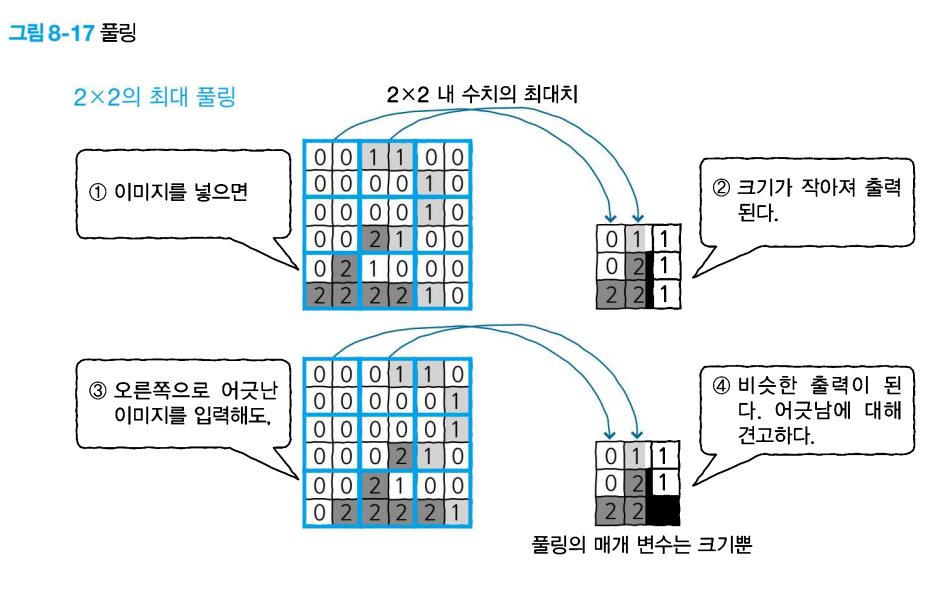

이렇게 하여 얻은 출력 이미지는, 입력 이미지가 가로 세로로 어긋나도 거의 변하지 않는 성질을 갖는다. 이 풀링층을 네트워크에 도입하여 위치만 어긋난 이미지에 비슷한 출력을 반환하는 성질을 덧붙일 수 있다.

최대 풀링 외에 평균 풀링이 있다. 이 경우, 작은 영역의 수치의 평균을 출력값으로 한다.

2x2뿐만 아니라 3x3 또는 4x4로 임의로 크기를 결정할 수 있다. 그에 대한 스트라이드도 임의로 결정할 수 있지만 3x3에 대해서는 스트라이드 3, 4x4에 대해서는 스트라이드 4와 같이 작은 공간의 크기와 같은 크기로 하는 경우가 많다.

##8.7 드롭아웃

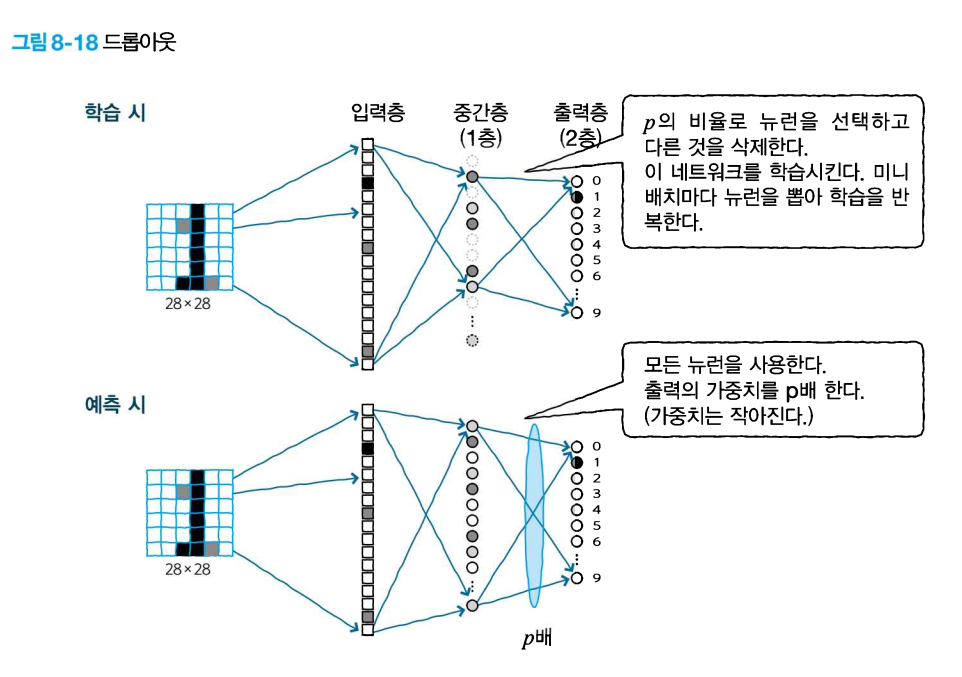

드롭 아웃 : 학습 시에 입력층의 유닛과 중간층 뉴런을 확률 $p (p1)$로 임의 선택하여, 나머지를 무효화하는 방법

무효화된 뉴런은 존재하지 않는 것으로 하여 학습을 갱신한다.

미니 배치마다 뉴런을 뽑아 다시 이 절차를 반복한다.

학습 후 예측하는 경우에는 모든 뉴런이 사용된다. 학습 시에는 $p$의 비율의 뉴런밖에 존재하지 않는 상태에서 학습하고 있었는데, 예측 시에 전체 참가가 되면 출력이 커져 버린다. $(1/p)$배. 그래서 예측 시에는 드롭아웃을 한 층의 출력 대상의 가중치를 $p$배로 하여($p$는 1 이하이므로 줄이게 된다) 작게 설정하여 계산을 맞춘다.

드롭아웃은 여러 네트워크를 각각 학습시켜 예측 시에 네트워크를 평균화해 합치는 효과가 있다.

##8.8 MNIST 인식 네트워크 모델

1층, 2층에서 합성곱층을 연속시킨다.
1층 째의 합성곱층은 16장의 필터를 사용하고 있기 때문에 출력은 28x28의 이미지가 16장이 된다. 이것을 28x28x16의 3차원 배열의 데이터로 간주한다.

다음 층의 합성곱은 이 3차원 배열의 데이터에 대해 수행된다. 3x3의 1장의 필터는 실질적으로 3x3x16의 배열로 정의된다. 출력은 28x28x16의 블록이다. 16의 깊이분에 별도의 필터가 할당되어 독립적으로 처리되는 인상을 갖는다. 이 3x3x16의 크기를 가지는 필터가 32개 있는 두번째 레이어의 합성곱층이다. 필터를 정의하는 매개 변수의 수는 바이어스항을 제외하면 3x3x16x32이 된다.

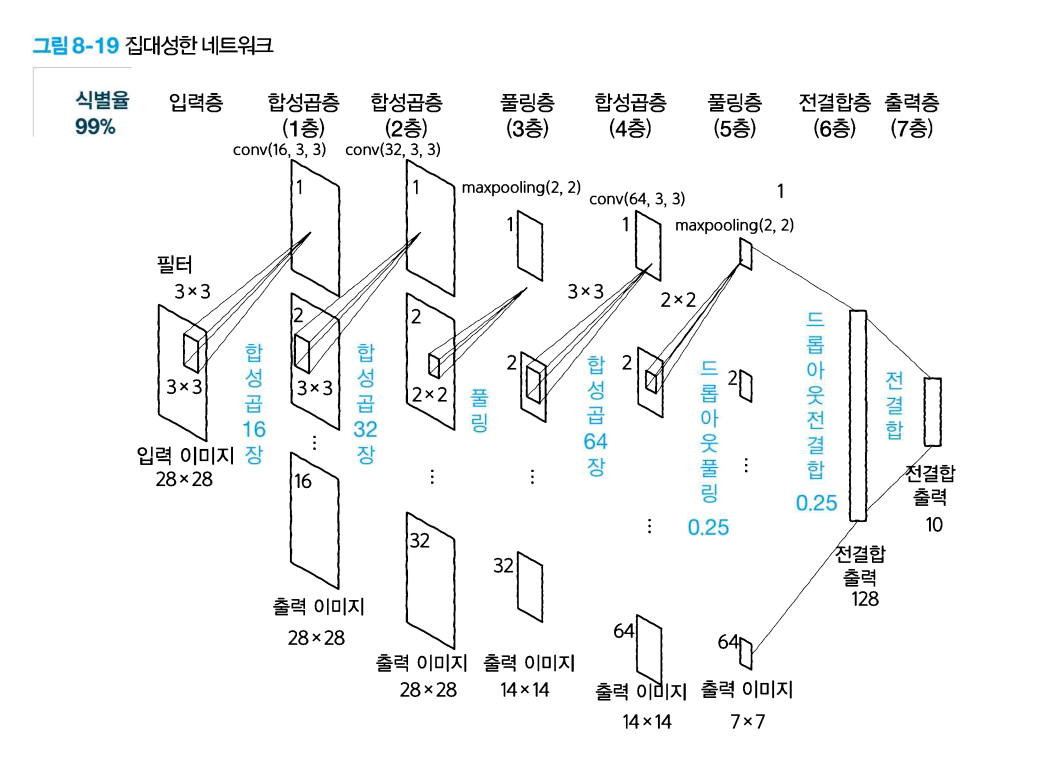

3층 째는 2x2 맥스 풀링층으로 이미지의 가로 세로의 크기는 절반인 14x14이 되고, 4층 째에서 한 번 더 합성곱층이 온다. 여기서 필터의 수는 64장이다. 매개 변수의 수는 3x3x32x64이다. 5층 째에서 다시금 맥스 풀링에 의한 이미지 크기가 7x7로 되어, 다음 6층 째는 128개의 전결합, 마지막 7층 째는 출력이 10개인 전결합층이 된다. 5층과 6층에서는 드롭아웃도 넣고 있다.

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(A)
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(B)
model.add(Dropout(0.25)) #(C)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) #(D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss:", score[0])
print("test accu:", score[1])
print("computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 6s 33ms/step - loss: 0.7596 - accuracy: 0.7611 - val_loss: 0.1523 - val_accuracy: 0.9551
Epoch 2/20
60/60 [==============================] - 2s 29ms/step - loss: 0.1556 - accuracy: 0.9544 - val_loss: 0.0709 - val_accuracy: 0.9767
Epoch 3/20
60/60 [==============================] - 2s 32ms/step - loss: 0.0960 - accuracy: 0.9710 - val_loss: 0.0451 - val_accuracy: 0.9849
Epoch 4/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0732 - accuracy: 0.9771 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 5/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0574 - accuracy: 0.9820 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 6/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 7/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0258 - val_accuracy: 0.9917
Epoch 8/20
60

313/313 [==============================] - 1s 2ms/step


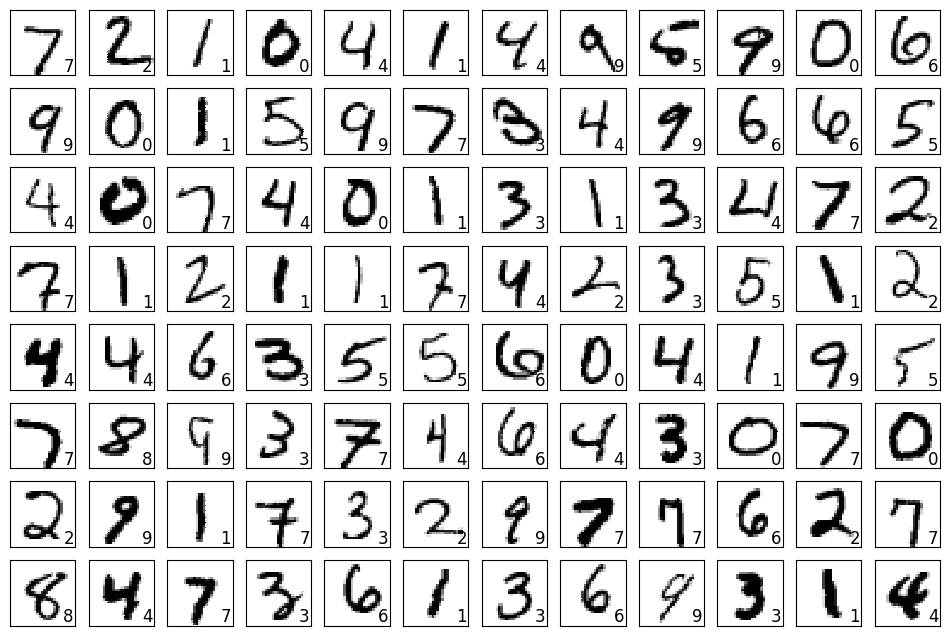

In [ ]:
show_prediction()
plt.show()

MNIST 데이터보다 더 큰 크기의 자연의 이미지를 처리하거나 많은 카테고리를 다루는 경우에는 층의 심층화, 합성곱, 풀링, 드롭아웃의 효과가 더욱 강력하게 발휘될 것이다.